# Reply to Reviewers

In [5]:
# Import Functions
from important_functions import get_last_ap
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18 
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['savefig.transparent'] = True
plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['legend.frameon'] = 'False'

# Load Datasets
data_path = './data'
sens_data = pd.read_csv(data_path+'/sens_opt.csv.bz2')
sens_data_base = pd.read_csv(data_path+'/sens_baseline.csv.bz2')

### Reviewer 1 Responses

1. The only major issue is the effect of $I_{NaL}$. The authors seem to find it protective yet, as cited, its upregulation is usually associated with EADs. The authors should illustrate that $I_{NaL}$ can reduce RR as well. 

Text(0, 0.5, 'RRC (A/F)')

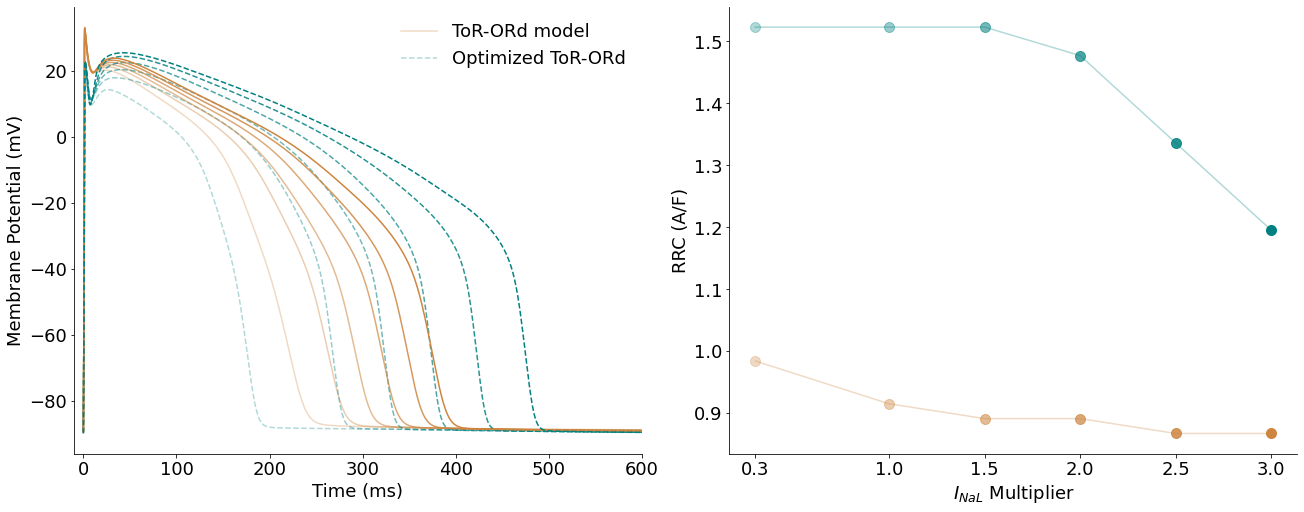

In [6]:
fig, axs = plt.subplots(1, 2, figsize = (18,7), constrained_layout = True)
vals = ['0.3', '1', '1.5', '2', '2.5', '3']
conds = ['i_nal_multiplier']
alphas = [0.3, 0.4, 0.55, 0.7, 0.85, 1]
rrc_vals = []
rrc_vals_opt = []
i = 0

# LEFT PLOT
#axs[0].plot(eval(best_data['t'][0]), eval(best_data['v'][0]), label = 'OM', linewidth=5)
for x in range(0, len(vals)):
    val = vals[x]
    t = eval(sens_data_base[sens_data_base['cond'] == conds[i]]['t_'+val].reset_index(drop = True)[0])
    v = eval(sens_data_base[sens_data_base['cond'] == conds[i]]['v_'+val].reset_index(drop = True)[0])
    t_opt = eval(sens_data[sens_data['cond'] == conds[i]]['t_'+val].reset_index(drop = True)[0])
    v_opt = eval(sens_data[sens_data['cond'] == conds[i]]['v_'+val].reset_index(drop = True)[0])

    data = get_last_ap([t, v], 4, cl = 1000, type = 'half')
    data_opt = get_last_ap([t_opt, v_opt], 4, cl = 1000, type = 'half')

    rrc_val = sens_data_base[sens_data_base['cond'] == conds[i]]['rrc'+val].reset_index(drop=True)[0]
    rrc_val_opt = sens_data[sens_data['cond'] == conds[i]]['rrc'+val].reset_index(drop=True)[0]
    rrc_vals.append(rrc_val*10)
    rrc_vals_opt.append(rrc_val_opt*10)

    axs[0].plot(data['t']-data['t'][0], data['v'], color = 'peru', alpha = alphas[x])
    axs[0].plot(data_opt['t']-data_opt['t'][0], data_opt['v'], linestyle = 'dashed', color = 'teal', alpha = alphas[x])

    axs[1].scatter(eval(val), rrc_val*10, color = 'peru', alpha = alphas[x], s = 100)
    axs[1].scatter(eval(val), rrc_val_opt*10, color = 'teal', alpha = alphas[x], s=100)

axs[0].legend(['ToR-ORd model', 'Optimized ToR-ORd'])
axs[0].set_xlim([-10, 600])
axs[0].set_xlabel('Time (ms)')
axs[0].set_ylabel('Membrane Potential (mV)')

# RIGHT PLOT
axs[1].plot([eval(y) for y in vals], rrc_vals, color = 'peru', alpha = 0.3)
axs[1].plot([eval(y) for y in vals], rrc_vals_opt, color = 'teal', alpha = 0.3)
axs[1].set_xticks([eval(y) for y in vals])
axs[1].set_xlabel('$I_{NaL}$ Multiplier')
axs[1].set_ylabel('RRC (A/F)')

2. How is the limit of 3 on $I_{NaL}$ scaling affecting the optimization?